In [1]:
# executeme

using NBInclude
@nbinclude("Hofstadter Single Particle in Julia.ipynb")

Hofstadter_SP (generic function with 1 method)

In [2]:
# executeme

using QuantumOptics

In [78]:
Nx = 5; Ny = 5; N=Nx*Ny; q = 5
PN = 1
U = 0

0

In [79]:
# executeme

function get_Bosonic_MB_Basis(N,PN)
   
    NBasis = NLevelBasis(N)
    NStates = bosonstates(NBasis, PN)
    
    NBasis_MB = ManyBodyBasis(NBasis, NStates)
    
    return NBasis_MB, NBasis
end

get_Bosonic_MB_Basis (generic function with 1 method)

In [80]:
basis_mb, basis = get_Bosonic_MB_Basis(N,PN)

(ManyBody(onebodybasis=NLevel(N=25), states:25), NLevel(N=25))

In [81]:
# executeme

function get_Kinetic_Part(N, MB_Basis, Sp_Op)
    KT = SparseOperator(MB_Basis)
    for m in 1:N
        for n in 1:N
            KT = KT + Sp_Op[m,n] * transition(MB_Basis, m, n)
        end
    end
    
    return KT
end

get_Kinetic_Part (generic function with 1 method)

In [82]:
basis2 = basis ⊗ basis

# interaction : at_i at_i a_i a_i = at_i a_i at_i a_i - at_i a_i = n_i n_i - n_i
    
Vint2 = SparseOperator(basis2)

for n in 1:N
    Vint2 += U/2*transition(basis,n,n)⊗transition(basis,n,n)
end

Vint_mb = manybodyoperator(basis_mb, Vint2)

Operator(dim=25x25)
  basis: ManyBody(onebodybasis=NLevel(N=25), states:25)sparse(Int64[], Int64[], ComplexF64[], 25, 25)

In [83]:
# executeme

function get_Int_Part(N, MB_Basis, U)
    IT = SparseOperator(MB_Basis)
    for m in 1:N
        IT = IT + U/2 * number(MB_Basis, m) * ( number(MB_Basis, m) - identityoperator(MB_Basis) ) 
    end
    
    return IT
end

get_Int_Part (generic function with 1 method)

In [84]:
Int_mb = get_Int_Part(N, basis_mb, U)

Operator(dim=25x25)
  basis: ManyBody(onebodybasis=NLevel(N=25), states:25)sparse(Int64[], Int64[], ComplexF64[], 25, 25)

In [85]:
# executeme

function Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Finite_U (generic function with 1 method)

1) If particle number=1 and U=0, Hofstadter Finite U energies has to be equal to Hofstadter Single Particle energies.

In [86]:
H_mb = Hofstadter_Finite_U(Nx, Ny, 1/q, PN, U)

Operator(dim=25x25)
  basis: ManyBody(onebodybasis=NLevel(N=25), states:25)sparse([2, 5, 6, 21, 1, 3, 7, 22, 2, 4  …  22, 24, 4, 19, 23, 25, 5, 20, 21, 24], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  23, 23, 24, 24, 24, 24, 25, 25, 25, 25], ComplexF64[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -0.30901699437494745 - 0.9510565162951536im, -0.30901699437494745 + 0.9510565162951536im, -1.0 + 0.0im, -1.0 + 0.0im  …  -1.0 + 0.0im, -1.0 + 0.0im, 0.8090169943749476 + 0.587785252292473im, 0.8090169943749476 - 0.587785252292473im, -1.0 + 0.0im, -1.0 + 0.0im, -0.30901699437494723 + 0.9510565162951536im, -0.30901699437494723 - 0.9510565162951536im, -1.0 + 0.0im, -1.0 + 0.0im], 25, 25)

In [87]:
eigenenergies(H_mb)

INFO: Defaulting to sparse diagonalization.
        If storing the full operator is possible, it might be faster to do
        eigenstates(dense(op)). Set info=false to turn off this message.


6-element Vector{ComplexF64}:
  -2.966447989143376 + 3.91176755700981e-17im
 -2.9664479891433735 - 1.66438586003681e-16im
 -2.9664479891433713 + 7.806255641895632e-18im
 -2.9664479891433704 - 2.699070486425828e-17im
  -2.966447989143366 - 2.8406096919120216e-17im
 -0.9021130325903076 + 2.8866920653985074e-17im

In [88]:
eigenenergies(dense(Hofstadter_Finite_U(Nx,Ny,1/q,PN,U)))

25-element Vector{Float64}:
 -2.966447989143374
 -2.966447989143373
 -2.966447989143372
 -2.966447989143372
 -2.9664479891433717
 -0.9021130325903087
 -0.9021130325903075
 -0.902113032590307
 -0.9021130325903065
 -0.9021130325903061
 -0.3819660112501061
 -0.381966011250105
 -0.3819660112501049
 -0.38196601125010354
 -0.38196601125010315
  1.3484140003934757
  1.3484140003934764
  1.348414000393477
  1.3484140003934773
  1.3484140003934784
  2.9021130325903055
  2.9021130325903055
  2.902113032590307
  2.9021130325903077
  2.902113032590309

In [89]:
-2*2.966447989143374

-5.932895978286748

In [61]:
using LinearAlgebra
eigen(Hofstadter_SP(4, 4, 1/4, 0))

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
16-element Vector{Float64}:
 -2.8284271247461903
 -2.8284271247461894
 -2.8284271247461876
 -2.828427124746186
 -5.2522064953280833e-17
 -4.096276609083728e-17
  4.549236813691332e-17
  2.873843025920042e-16
  3.1086244689504383e-15
  3.552713678800501e-15
  3.552713678800501e-15
  3.9968028886505635e-15
  2.82842712474619
  2.82842712474619
  2.8284271247461903
  2.8284271247461903
vectors:
16×16 Matrix{ComplexF64}:
  -0.190017+0.23738im     …        0.125-0.125im
  -0.239759+0.134569im               0.0+0.0im
  -0.397181+0.173748im            -0.125-0.125im
  -0.230103+0.218599im       6.49467e-17+0.353553im
 0.00822041+0.154294im               0.0+0.0im
   0.118836-0.013655im    …          0.0+0.0im
   0.368783-0.0739609im              0.0+0.0im
   0.207163+0.0636314im            -0.25+3.08149e-33im
  -0.112731+0.149052im             0.125+0.125im
  -0.120804+0.0936853im              0.0+0.0im
  -0.319894+0.0854

In [50]:
function get_Fermionic_MB_Basis(N,PN)
    b_hard = NLevelBasis(N)
    states_hard = fermionstates(b_hard, [PN])
    b_mb_hard = ManyBodyBasis(b_hard, states_hard)
    
    return b_mb_hard
end

get_Fermionic_MB_Basis (generic function with 1 method)

In [51]:
function Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis = get_Fermionic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Hard_Core (generic function with 1 method)

2) If U>>1, Hofstadter Finite U energies converges at Hofstadter Hard Core energies.

3) If you want to see topological dejeneracy:
\begin{align}
&N_{\alpha}=N_xN_y\alpha \\
&N/N_{\alpha}=1/2 
\end{align}

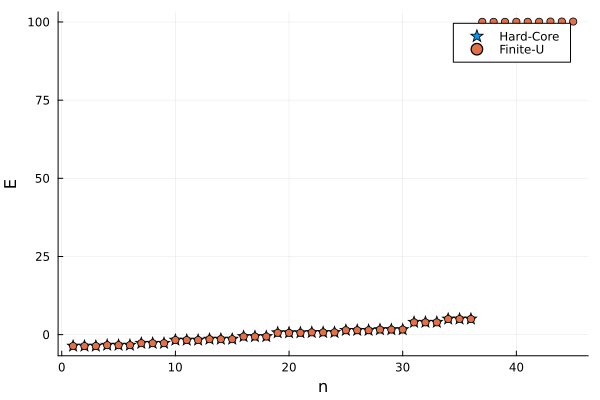

In [12]:
using Plots

Nx = 3; Ny = 3; alpha = 1/3; PN = 2; U = 100

E1 = eigenenergies(dense(Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)))
E2 = eigenenergies(dense(Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)))

plot(1:length(E1), E1, seriestype=:scatter, markershape=:star5, markersize=6, label="Hard-Core")
plot!(1:length(E2), E2, seriestype=:scatter, label="Finite-U")

xlabel!("n");ylabel!("E")